<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

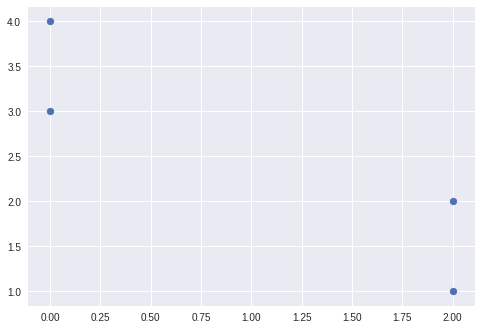

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#notfunc = np.array([[0,4], [0,3] [2,2], [2,1]])
notfuncx = np.array([0,0,2,2])
notfuncy = np.array([4,3,2,1])
plt.scatter(notfuncx, notfuncy)


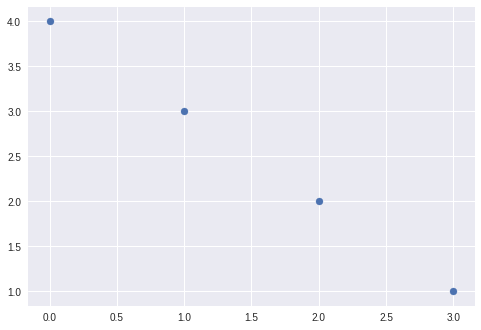

In [9]:
#func = [[0,4], [1,3] [2,1], [3,2]]
funcx = np.array([0,1,2,3])
funcy = np.array([4,3,2,1])
plt.scatter(funcx, funcy)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Y values on a graph of a function are representing the output of solving the function for x. There can not be two outputs for the same x input. When there are multiple y values to a point on the graph's x axis, it means that the underlying coordinates solve for that x multiple times but get a different result, which shouldn't be possible if x has only been passed through one function.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Valid function coordinates: Relation 2 <br>
There can not be two outputs for the same x input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Function 1: 3D input, 3D output <br>
Function 2: 4D input, 2D outout

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

f(x) = (cos(x), sin(x)) is a fairly commonly seen example

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [29]:
def p(x,y):
  return np.array([[x+3*y], [2*y-x]])
px1 = p(1,0)
px1

array([[ 1],
       [-1]])

In [30]:
px2 = p(0,1)
px2

array([[3],
       [2]])

In [36]:
pT = np.array([[1, 3],[-1,2]])
pT

array([[ 1,  3],
       [-1,  2]])

In [39]:
def q(x,y,z):
  return np.array([[4*x + y + 2*z],[2*y - x + 3*z],[5*x - 2*z + y]])
qx1 = q(1,0,0)
qx1

array([[ 4],
       [-1],
       [ 5]])

In [40]:
qx2 = q(0,1,0)
qx2

array([[1],
       [2],
       [1]])

In [41]:
qx3 = q(0,0,1)
qx3

array([[ 2],
       [ 3],
       [-2]])

In [42]:
qT = np.array([[4,1,2],[-1,2,3],[5,1,-2]])
qT

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [37]:
np.matmul(pT, [[3],[4]])

array([[15],
       [ 5]])

In [33]:
p(3,4)

array([[15],
       [ 5]])

In [43]:
np.matmul(qT, [[3],[4],[5]])

array([[26],
       [20],
       [ 9]])

In [44]:
q(3,4,5)

array([[26],
       [20],
       [ 9]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are not reoriented in nD space when manipulated. This makes them useful for inferences on the rest of the set because the other vectors in the nD space can be volatile. <br>
Eigenvectors may be multiplied by a special scalar known as an eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

If you don't have the appropiate number of observations *for the dimension*, which can be impractically high as you plot more dimensions or simply easy to forget about accounting for, your data will under or overfit. Dimensional spaces over 2d are impossible to visualize perfectly if they can at all.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

number of observations == at least five times the number of dimensions

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [77]:
dfnum = df.select_dtypes(include=np.number, exclude=['object'])
dfnum.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [68]:
import statistics
means = []
stdevs = []
for label, columns in dfnum.iteritems():
  means.append(statistics.mean(columns))
  stdevs.append(statistics.stdev(columns))
means

[5.843333333333334, 3.054, 3.7586666666666666, 1.1986666666666668]

In [72]:
stdevs

[0.8280661279778629,
 0.43359431136217363,
 1.7644204199522626,
 0.7631607417008411]

In [78]:
dfnum['sepal_length'] = dfnum['sepal_length']-means[0]
dfnum['sepal_width'] = dfnum['sepal_width']-means[1]
dfnum['petal_length'] = dfnum['petal_length']-means[2]
dfnum['petal_width'] = dfnum['petal_width']-means[3]
dfnum.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667


In [79]:
dfnum['sepal_length'] = dfnum['sepal_length']/stdevs[0]
dfnum['sepal_width'] = dfnum['sepal_width']/stdevs[1]
dfnum['petal_length'] = dfnum['petal_length']/stdevs[2]
dfnum['petal_width'] = dfnum['petal_width']/stdevs[3]
dfnum.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593


In [81]:
cov = dfnum.cov()
cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [83]:
eigvalues, eigvector = np.linalg.eig(cov)
eigvalues

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [84]:
eigvector

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [99]:
P = eigvector.T.dot(dfnum.T)
P.T

array([[-2.25698063e+00, -5.04015404e-01, -1.21536190e-01,
         2.29962838e-02],
       [-2.07945912e+00,  6.53216394e-01, -2.26492063e-01,
         1.02863642e-01],
       [-2.36004408e+00,  3.17413945e-01,  5.13077379e-02,
         2.77323192e-02],
       [-2.29650366e+00,  5.73446613e-01,  9.85303586e-02,
        -6.60900544e-02],
       [-2.38080159e+00, -6.72514411e-01,  2.13563034e-02,
        -3.72724209e-02],
       [-2.06362348e+00, -1.51347827e+00,  3.05818064e-02,
         4.38408784e-03],
       [-2.43754534e+00, -7.43137171e-02,  3.41055070e-01,
        -3.79693659e-02],
       [-2.22638327e+00, -2.46787172e-01, -8.22987560e-02,
        -2.54200029e-02],
       [-2.33413810e+00,  1.09148977e+00,  1.53049668e-01,
        -2.67043670e-02],
       [-2.18136797e+00,  4.47131117e-01, -2.45736283e-01,
        -3.97740567e-02],
       [-2.15626287e+00, -1.06702096e+00, -2.63127870e-01,
         1.52500486e-02],
       [-2.31960686e+00, -1.58057946e-01,  9.98311719e-02,
      

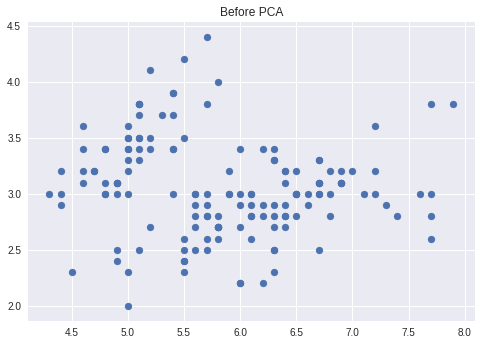

In [98]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.title('Before PCA')
plt.show()

Text(0.5, 0, 'PC1, or sepal length')

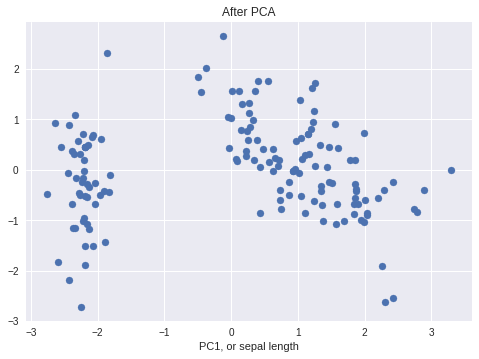

In [105]:
plt.scatter(P[0], P[1])
plt.title('After PCA')
plt.xlabel('PC1, or sepal length')

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)